In [15]:
# viz pkgs
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

plt.style.use("fivethirtyeight")

In [3]:
nltk.download("stopwords")

# stopwords
stopwords_set = set(stopwords.words("english"))

# update stopwords set
stopwords_set.update(
    ["s", "will", "amp", "must", "rt", "american", "americans", "re", "000"]
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/denniesbor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## N-grams

In [7]:
df = pd.read_csv("raw_tweets.csv")

In [12]:
# plot of the top ngrams
def get_top_ngram(corpus, n=None, range=10):
    """Function that sorts top ngrams in descending order"""

    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords_set).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:range]

### Visualize most occurring words

In [39]:
word_freq = get_top_ngram(df.clean_text, n=1, range=1000)

In [13]:
# get the bi-grams of in the tweets

bi_grams = get_top_ngram(df.clean_text, n=2, range=1000)

In [26]:
# plot the n-grams in a barchart
def plot_top_ngrams_barchart(grams: list, n=10):

    """Function to plot ngrams.

    Parameters:
    ------------
    input: list

    Returns
    ------------
    output: map obj
    """
    grams = grams[:n]
    x, y = map(list, zip(*grams))

    return x, y

/tmp/ipykernel_138132/4122826836.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


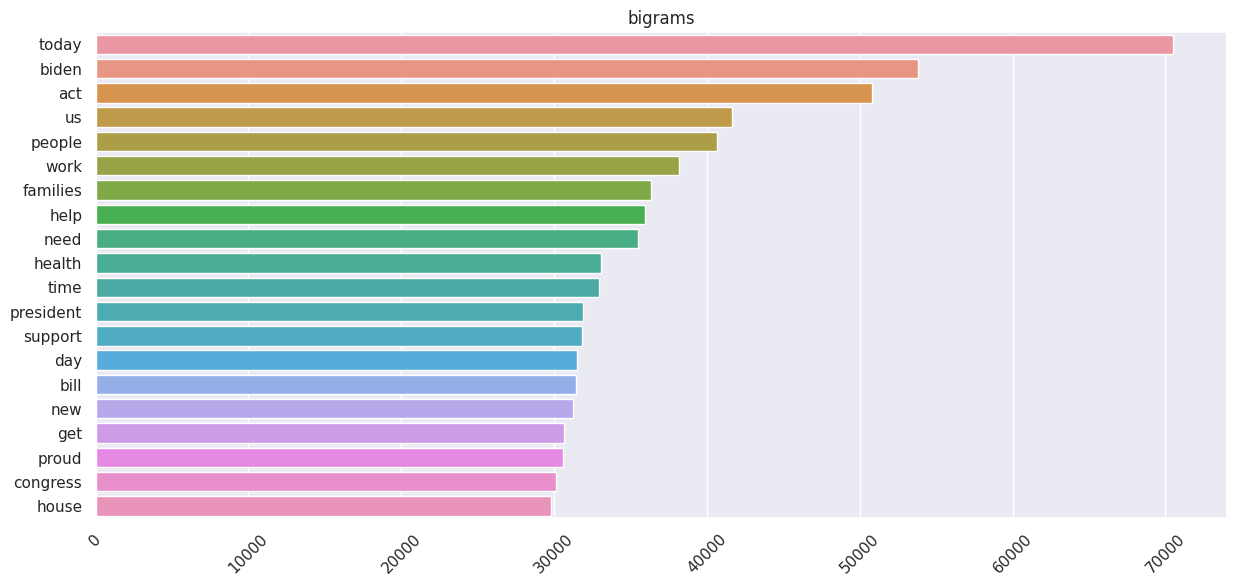

In [44]:
# plot of frequent 20 words

x, y = plot_top_ngrams_barchart(word_freq, n=20)
sns.set(rc={"figure.figsize": (13, 6)})
g = sns.barplot(x=y, y=x)
g.set_title("bigrams")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [27]:
bi_grams[:10]

[('president biden', 14608),
 ('covid 19', 12489),
 ('let us', 10723),
 ('health care', 10449),
 ('biden administration', 9516),
 ('united states', 7227),
 ('across country', 7079),
 ('small businesses', 6585),
 ('joe biden', 5828),
 ('last week', 5805)]

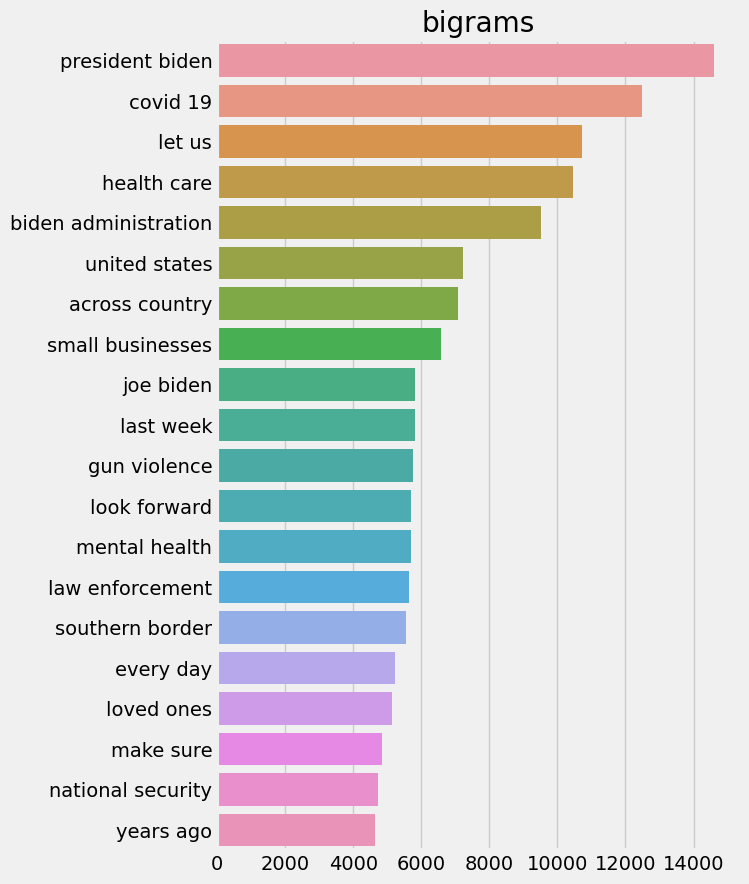

In [34]:
# plot of bi-grams
x, y = plot_top_ngrams_barchart(bi_grams, n=20)
fig, ax = plt.subplots(figsize=(6, 10))
ax.set_title("bigrams")
sns.barplot(x=y, y=x)
plt.show()

In [32]:
# get the tri-grams of in the tweets

tri_grams = get_top_ngram(df.clean_text, n=3, range=1000)

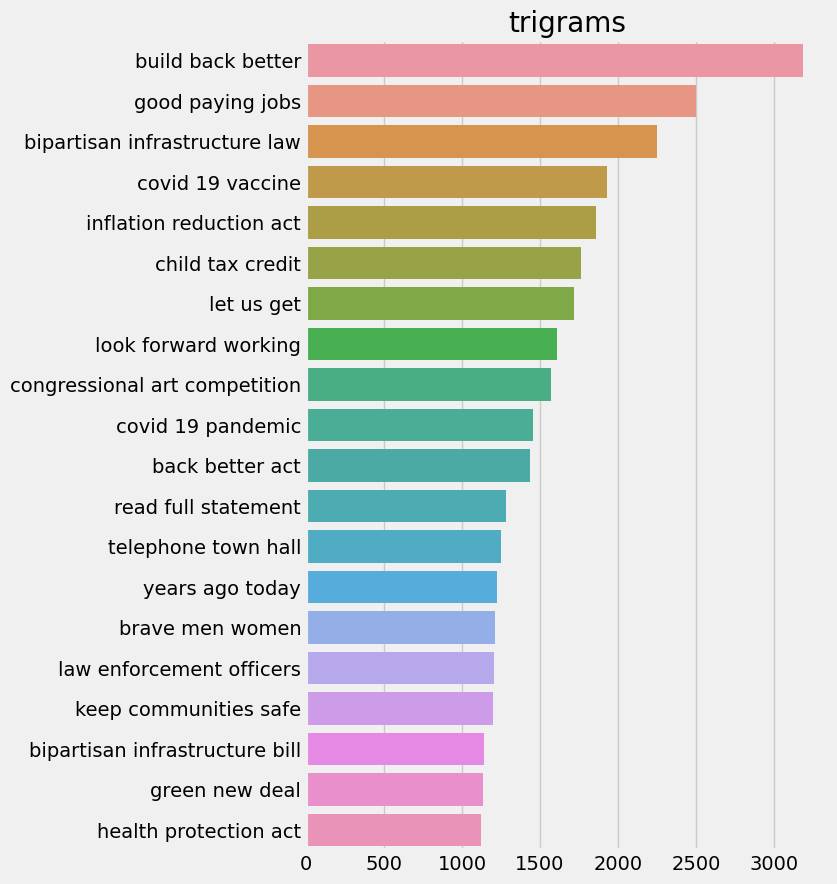

In [35]:
# plot of tri-grams
x, y = plot_top_ngrams_barchart(tri_grams, n=20)
fig, ax = plt.subplots(figsize=(6, 10))
ax.set_title("trigrams")
sns.barplot(x=y, y=x)
plt.show()

**From the charts above, it's clear that with n-grams, we can identify the topics within the tweets. From this, we can use these words to query for the tweets belonging to a particular topic of interest. First, we export these bigrams and trigrams into a CSV file and add a new column called topic category. We are interested in unique words for a particular discussion.**

## LDA

LDA topic modelling discovers hidden (latent) topics in text documents. It does this by inferring possible topics based on the words in the documents using a generative probabilistic model and Dirichlet distributions.
LDA allows us to efficiently analyze large volumes of text by clustering documents into topics.

LDA makes the following assumptions:

1. Documents are probability distributions over topics.
2. Topics are probability distributions over words.

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

In [38]:
# text pre-processing
cv = CountVectorizer(max_df=0.9, min_df=5, stop_words="english")

# document term matrix
dtm = cv.fit_transform(df["clean_text"])
dtm

<566972x36743 sparse matrix of type '<class 'numpy.int64'>'
	with 9168411 stored elements in Compressed Sparse Row format>

In [45]:
# assign number of topics
topics = 10

# Define model
LDA = LatentDirichletAllocation(n_components=topics, random_state=42)

# Fit model
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [46]:
# assign number of words
word_count = 15

# loop to print top 15 words for 3 topics
for i, topic in enumerate(LDA.components_):
    print(
        "The top  {word_count} word for topic # {i} is:".format(
            word_count=word_count, i=i
        )
    )
    print(
        [cv.get_feature_names_out()[index] for index in topic.argsort()[-word_count:]]
    )
    print("\n")

The top  15 word for topic # 0 is:
['mental', 'today', 'pandemic', 'need', 'workers', 'women', 'veterans', 'access', '19', 'vaccine', 'amp', 'act', 'covid', 'care', 'health']


The top  15 word for topic # 1 is:
['assistance', 'check', 'hall', 'student', 'information', 'amp', 'town', 'students', 'join', 'learn', 'visit', 'school', 'help', 'today', 'office']


The top  15 word for topic # 2 is:
['meeting', 'county', 'proud', 'week', 'discuss', 'new', 'national', 'support', 'ukraine', 'today', 'thank', 'work', 'community', 'great', 'amp']


The top  15 word for topic # 3 is:
['community', 'families', 'safety', 'enforcement', 'lost', 'act', 'communities', 'law', 'police', 'today', 'safe', 'gun', 'lives', 'amp', 'violence']


The top  15 word for topic # 4 is:
['los', 'para', 'joe', 'security', 'en', 'afghanistan', 'el', 'illegal', 'la', 'southern', 'president', 'crisis', 'administration', 'border', 'biden']


The top  15 word for topic # 5 is:
['president', 'policies', 'year', 'families',

### Conclusion

From the n-grams and LDA, we can visualize the most conspicuous topics with the dataset. The next step is to group the topics into two categories - social and geopolitical policies. In these categories exists subgroups such as inflation, climate change, Ukraine-Russia, women's reproductive rights, LGBTQ, etc. We create a CSV file from the bigrams and tri-grams and assign each word tuple to a category, also a topic. These words are useful in querying the dataset. From this, we shall create a  JSON file with the following structure.
<br />
```python
{
    "Social Policies": {"topic": ["keywords"]},
    "Geo Political Policies": {"topic": ["keywords"]},
}
```
<br />
For example
<br />

```python
{
    "Social Policies": {
        "women health, and rights": [
            "abortion",
            "maternal",
            "momnibus",
        ],
        "guns and assault weapons": [
            "guns",
            "arms",
        ],
    },
    "Geo Political Policies": {
        "ukraine russia": [
            "vladimir",
            "invasion",
            "supplemental",
        ],
    },
}
```
<br />
Save this as a JSON file for use in the next section.